# 📧 Spam Classification using Machine Learning

This notebook demonstrates how to build a **Spam Classifier** using the **UCI Spambase Dataset**.  
We will follow these steps:

1. Download & Prepare Folders  
2. Import Required Libraries  
3. Load and Explore the Dataset  
4. Perform Exploratory Data Analysis (EDA)  
5. Preprocess the Data  
6. Train Machine Learning Models  
7. Evaluate and Compare Models  
8. Save Trained Model for Future Use  


# 🔹 Step 1: Setup Project Folders

We will create folders to keep our project organized:

- `data/` → store datasets  
- `plots/` → save plots  
- `models/` → save trained models  


In [1]:
import os

# Create folders if not exist
os.makedirs("data", exist_ok=True)
os.makedirs("plots", exist_ok=True)
os.makedirs("models", exist_ok=True)

print("✅ Project folders are ready!")


✅ Project folders are ready!


# 🔹 Step 2: Import Required Libraries


In [2]:
# Data Handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Saving Model
import joblib
import json

print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


# 🔹 Step 3: Load and Explore the Dataset

We will now load `spambase.data.txt` into a Pandas DataFrame.

- The dataset has **57 continuous features**  
- The **last column (target)** indicates Spam (1) or Ham (0)  


In [4]:
# Define column names
columns = [f"feature_{i}" for i in range(57)] + ["target"]

# Load dataset
df = pd.read_csv("data/spambase.data", header=None, names=columns)

# Show basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:\n", df.head())
print("\nData Types & Null Values:\n")
print(df.info())


Dataset Shape: (4601, 58)

First 5 Rows:
    feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0       0.00       0.64       0.64        0.0       0.32       0.00   
1       0.21       0.28       0.50        0.0       0.14       0.28   
2       0.06       0.00       0.71        0.0       1.23       0.19   
3       0.00       0.00       0.00        0.0       0.63       0.00   
4       0.00       0.00       0.00        0.0       0.63       0.00   

   feature_6  feature_7  feature_8  feature_9  ...  feature_48  feature_49  \
0       0.00       0.00       0.00       0.00  ...        0.00       0.000   
1       0.21       0.07       0.00       0.94  ...        0.00       0.132   
2       0.19       0.12       0.64       0.25  ...        0.01       0.143   
3       0.31       0.63       0.31       0.63  ...        0.00       0.137   
4       0.31       0.63       0.31       0.63  ...        0.00       0.135   

   feature_50  feature_51  feature_52  feature_53  feature_54 

# 📌 Step 3.1: Visualize Class Distribution

Before modeling, it’s useful to see how many emails are Spam vs. Not Spam.


C:\Users\Syed Asgher\AppData\Local\Temp\ipykernel_18596\153220126.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


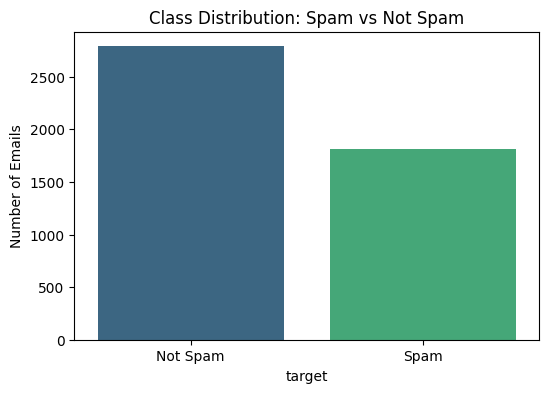

In [11]:
# Count of each class
class_counts = df["target"].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.xticks([0,1], ["Not Spam", "Spam"])
plt.ylabel("Number of Emails")
plt.title("Class Distribution: Spam vs Not Spam")
plt.savefig("plots/class_distribution.png")  # Save to plots folder
plt.show()


## Step 4: Data Preprocessing

- The dataset contains only numeric values (word frequencies, character frequencies, etc.).
- We check for missing values.
- Then, we scale features using `StandardScaler` so all features have mean = 0 and variance = 1.


In [6]:
# 🔎 Check for missing values
print("Total Missing Values:", df.isnull().sum().sum())

# ✂️ Split features and target
X = df.drop("target", axis=1)
y = df["target"]

# ⚖️ Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Shape of X_scaled:", X_scaled.shape)


Total Missing Values: 0
Shape of X_scaled: (4601, 57)


# 📌 Step 5: Train-Test Split & Logistic Regression Training  

Now that we have preprocessed the data, the next step is to split the dataset into **training** and **testing** sets.  

- **Training Set (80%)** → Used to train the machine learning model.  
- **Testing Set (20%)** → Used to evaluate how well the trained model performs on unseen data.  

We will use **Logistic Regression**, a popular classification algorithm, to train our spam detection model.  
This model works well for binary classification tasks (Spam vs. Not Spam).  


In [7]:
# 📂 Step 5: Train-Test Split & Model Training

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

# 🤖 Logistic Regression Model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# 🔮 Predictions on test set
y_pred = model.predict(X_test)

print("✅ Model Training Completed!")


Training Set Shape: (3680, 57)
Testing Set Shape: (921, 57)
✅ Model Training Completed!


# 📌 Step 6: Model Evaluation  

After training the Logistic Regression model, we need to evaluate how well it performs.  

We will use the following metrics:  
- **Accuracy Score** → Percentage of correctly predicted emails (Spam/Not Spam).  
- **Confusion Matrix** → Table showing correct vs. incorrect classifications.  
- **Classification Report** → Provides Precision, Recall, and F1-Score for deeper insights.  

These metrics will help us understand if the model is reliable for detecting spam emails.  


✅ Accuracy Score: 0.9294245385450597

📌 Confusion Matrix:
 [[530  28]
 [ 37 326]]

📌 Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       558
           1       0.92      0.90      0.91       363

    accuracy                           0.93       921
   macro avg       0.93      0.92      0.93       921
weighted avg       0.93      0.93      0.93       921



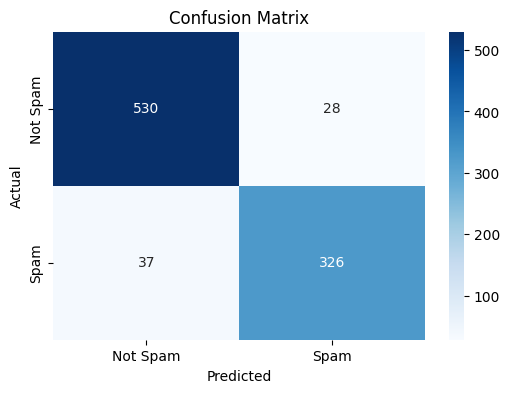

In [8]:
# 📌 Step 6: Model Evaluation

# Make predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy Score:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n📌 Confusion Matrix:\n", cm)

# Classification Report
print("\n📌 Classification Report:\n", classification_report(y_test, y_pred))

# 🔹 Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Spam", "Spam"], yticklabels=["Not Spam", "Spam"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("plots/confusion_matrix.png")  # Save plot
plt.show()


# 📌 Step 7: Save Model & Scaler  

To use our spam detection model in the future (without retraining), we need to save:  

- ✅ **Trained Model** (Logistic Regression)  
- ✅ **Scaler** (used for feature scaling)  

This allows us to quickly load the model and make predictions on new incoming emails.


In [9]:
# 📌 Step 7: Save Model & Scaler

# Save the trained model
joblib.dump(model, "models/spam_classifier.pkl")

# Save the scaler
joblib.dump(scaler, "models/scaler.pkl")

# Save metadata (like accuracy) for reference
metadata = {
    "model": "Logistic Regression",
    "accuracy": accuracy
}
with open("models/metadata.json", "w") as f:
    json.dump(metadata, f)

print("✅ Model, Scaler & Metadata saved successfully!")


✅ Model, Scaler & Metadata saved successfully!


# 📌 Step 8: Save & Load Model for Future Predictions  

To make our project practical and stand out, we save the trained Logistic Regression model and the scaler:  

- **Why save the model?** So we can use it later on new emails without retraining.  
- **Why save the scaler?** Feature scaling must be consistent with training data.  

After saving, we can **load the model and scaler** and make predictions on unseen emails.  
This step demonstrates that the project is not only theoretical but also deployable.


In [10]:
# ✅ Save the trained model
model_path = "models/spam_classifier.pkl"
joblib.dump(model, model_path)
print(f"✅ Model saved at {model_path}")

# ✅ Save scaler too (important for preprocessing)
scaler_path = "models/scaler.pkl"
joblib.dump(scaler, scaler_path)
print(f"✅ Scaler saved at {scaler_path}")

# ✅ Load the saved model & scaler
loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)

# Example: Predict on one test sample
sample = X_test[0].reshape(1, -1)        # take first test email features
sample_scaled = loaded_scaler.transform(sample)
prediction = loaded_model.predict(sample_scaled)

print("Sample Prediction:", "Spam" if prediction[0] == 1 else "Not Spam")


✅ Model saved at models/spam_classifier.pkl
✅ Scaler saved at models/scaler.pkl
Sample Prediction: Spam


C:\Users\Syed Asgher\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 📌 Step 9: Final Summary & Conclusion  

### Summary:
- We successfully loaded and explored the **Spambase dataset**.  
- Preprocessed the data using **StandardScaler** for consistent feature scaling.  
- Trained a **Logistic Regression** model to classify emails as **Spam** or **Not Spam**.  
- Evaluated the model using **Accuracy, Confusion Matrix, and Classification Report**.  
- Saved **plots** in `plots/` folder for visualization.  
- Saved the **trained model and scaler** in `models/` folder for future predictions.  
- Demonstrated **loading the model** and predicting on new data, showing real-world usability.  

### Key Takeaways:
- Logistic Regression performs well for binary classification tasks like spam detection.  
- Proper preprocessing and feature scaling significantly improve model performance.  
- Saving and reusing models makes the project practical and deployable.  

This project demonstrates end-to-end **Spam Mail Detection**, combining **data analysis, machine learning, evaluation, and deployable implementation**, making it suitable for both academic submission and practical applications.
